# Algunas de las preguntas de negocio pasadas al ORM para graficar

In [1]:
import os

# Parte de donde sea que esté el CWD actualmente
d = os.getcwd()

# Subir hasta encontrar la carpeta "Entregable"
while os.path.basename(d) != "Entregable":
    parent = os.path.dirname(d)
    if parent == d:   # Llegó al disco sin encontrar Entregable
        raise RuntimeError("No se encontró la carpeta Entregable hacia arriba.")
    d = parent

os.chdir(d)
print("CWD fijado en:", os.getcwd())

CWD fijado en: c:\Users\Mariana\Dropbox\Cursos\SoyHenry\DataEngineering\Modulo02-ModeladoDeDatosYBDRelacionales\ProyectoIntegrador\Entregable


In [2]:
# Conexión a la base de datos
import pandas as pd
from sqlalchemy import text
from src.database.connection import DB

engine = DB.engine()

def q(sql):
    return pd.read_sql(text(sql), engine)

print("Conexión a la base de datos exitosa")

Conexión a la base de datos exitosa


In [3]:
# Generar la sesión para el ORM

from src.database.models import (
    Usuario, Producto, Categoria, Orden, DetalleOrden,
    DireccionEnvio, MetodoPago, OrdenMetodoPago,
    ResenaProducto, HistorialPago, Carrito
)
from sqlalchemy.orm import Session

session = Session(engine)

## Productos más vendidos por volumen

In [4]:
# Primero realizo la consulta
from sqlalchemy import select, func

consulta = (
    select(
        Producto.nombre.label("nombre"),
        func.sum(DetalleOrden.cantidad).label("total_vendido"),
    )
    .join(DetalleOrden, DetalleOrden.producto_id == Producto.id)
    .group_by(Producto.nombre)
    .order_by(func.sum(DetalleOrden.cantidad).desc())
    .limit(10)
)

results = Session(engine).execute(consulta).all()
print(results)


[('Juego de Mesa Monopoly', 942), ('Consola PlayStation 5', 935), ('Termómetro Digital', 898), ('Jeans Skinny Mujer', 887), ('Smartwatch Xiaomi Mi Band 8', 887), ('Mini Proyector LED', 885), ('Cuaderno Universitario 100h', 876), ('Arenero para Gato', 874), ('Camiseta Básica Hombre', 868), ('Set de Lápices de Colores', 856)]


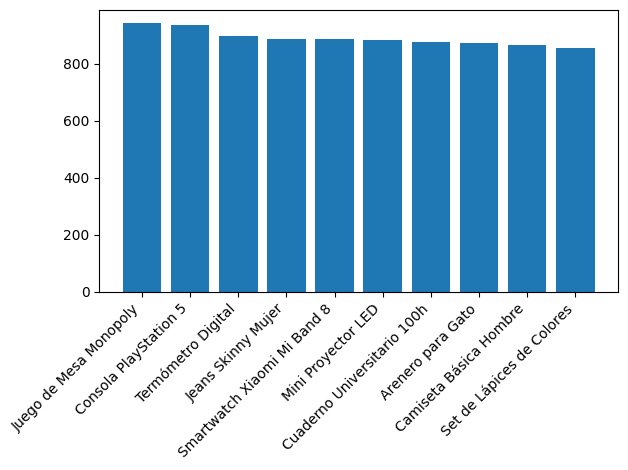

In [5]:
import matplotlib.pyplot as plt

nombres = [r.nombre for r in results]
totales = [r.total_vendido for r in results]

plt.bar(nombres, totales)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
